In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/timurista/data-analysis/master/python-jupyter/Cluster%20Analysis/3.01.%20Country%20clusters.csv')

data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


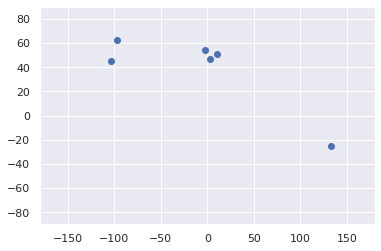

In [ ]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [ ]:
x=data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [ ]:
km=KMeans(3)
km.fit(x)

KMeans(n_clusters=3)

In [ ]:
cluster_result=km.fit_predict(x)
cluster_result

array([2, 2, 1, 1, 1, 0], dtype=int32)

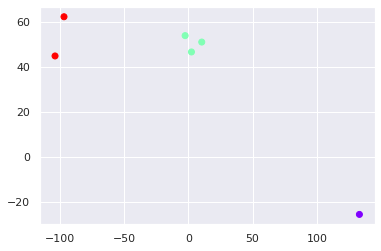

In [ ]:
data_cluster=data.copy()
data_cluster['Clusters']=cluster_result
plt.scatter(data_cluster['Longitude'], 
            data_cluster['Latitude'], 
            c=data_cluster['Clusters'],
            cmap='rainbow')

Text(0, 0.5, 'WCSS')

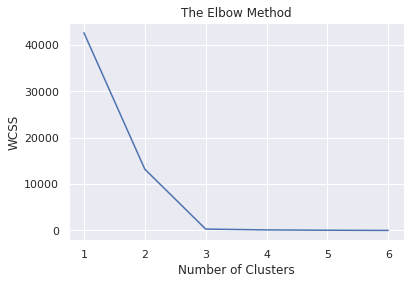

In [ ]:
wcss=[]

for i in range(1,7):
  km=KMeans(i)
  km.fit(x)
  wcss_iter=km.inertia_
  wcss.append(wcss_iter)

number_clusters=range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')